# Lab 2: Data Visualization and Exploration

## Setup

In [2]:
import sys
assert sys.version_info >= (3, 5)

In [3]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [4]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import seaborn as sb
import urllib.request

In [8]:
# Importing correlation coefficents
import scipy
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau

In [6]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Get the data

With this code, we are able to save the address of the data from a folder on the desktop and load it as a csv file.

In [7]:
address = '/Users/sohamkakra/Desktop/F21DL_Portfolio/Datasets/heart.csv'
data = pd.read_csv(address)

In [56]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Getting the null count and datatype of each row

In [62]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


This method prints information about a DataFrame including the dtype and columns, non-null values and memory usage.

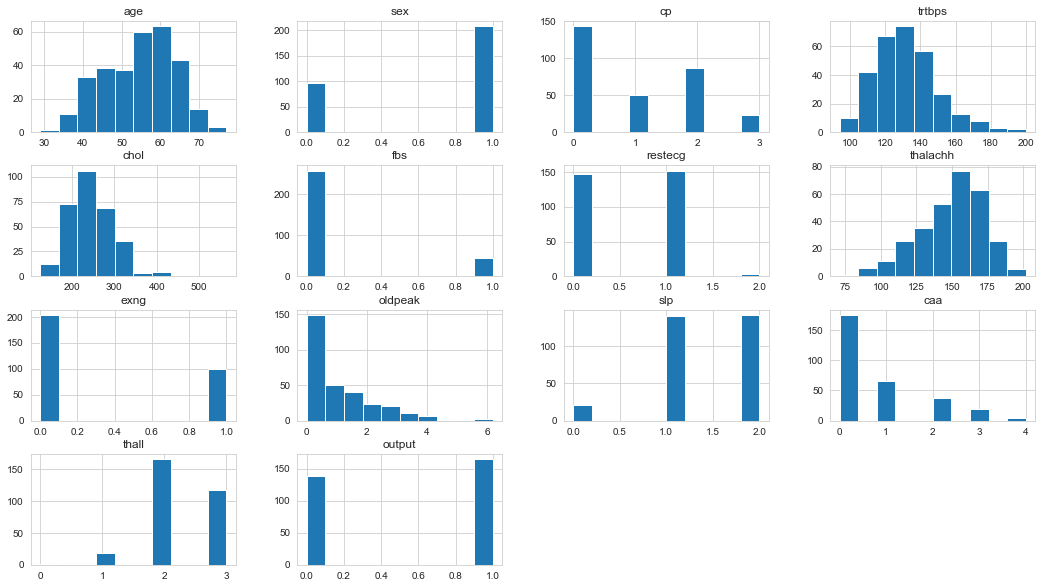

In [63]:
data.hist(bins=10, figsize=(18, 10))
plt.show()

Shows the Histogram for each of the columns given in the dataset with repect to number of supplies

In [64]:
#This method shows a statistical summary of the numerical attributes 
data.describe() 

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Visualizing Geographical Data

<AxesSubplot:xlabel='age', ylabel='thalachh'>

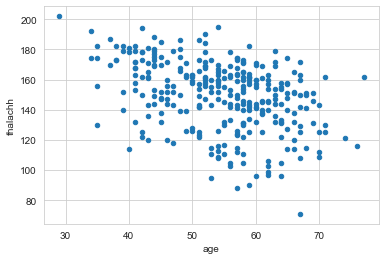

In [65]:
data.plot(kind="scatter", x="age", y="thalachh")

A scatter plot showing the relation between age and maximum heart rate achieved from the dataset of every patient

/Users/sohamkakra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp', ylabel='count'>

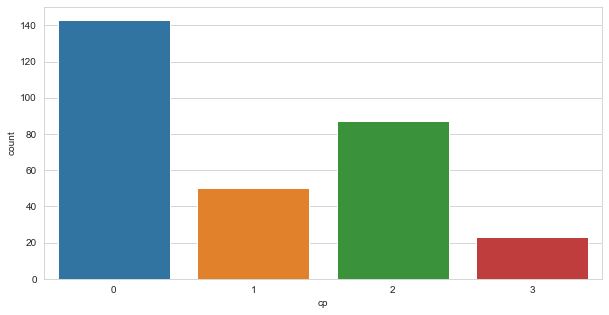

In [67]:
a4_dims = (10, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sb.countplot(data.cp)

A count plot showcasing a histogram of the type of chest pains recorded from patients

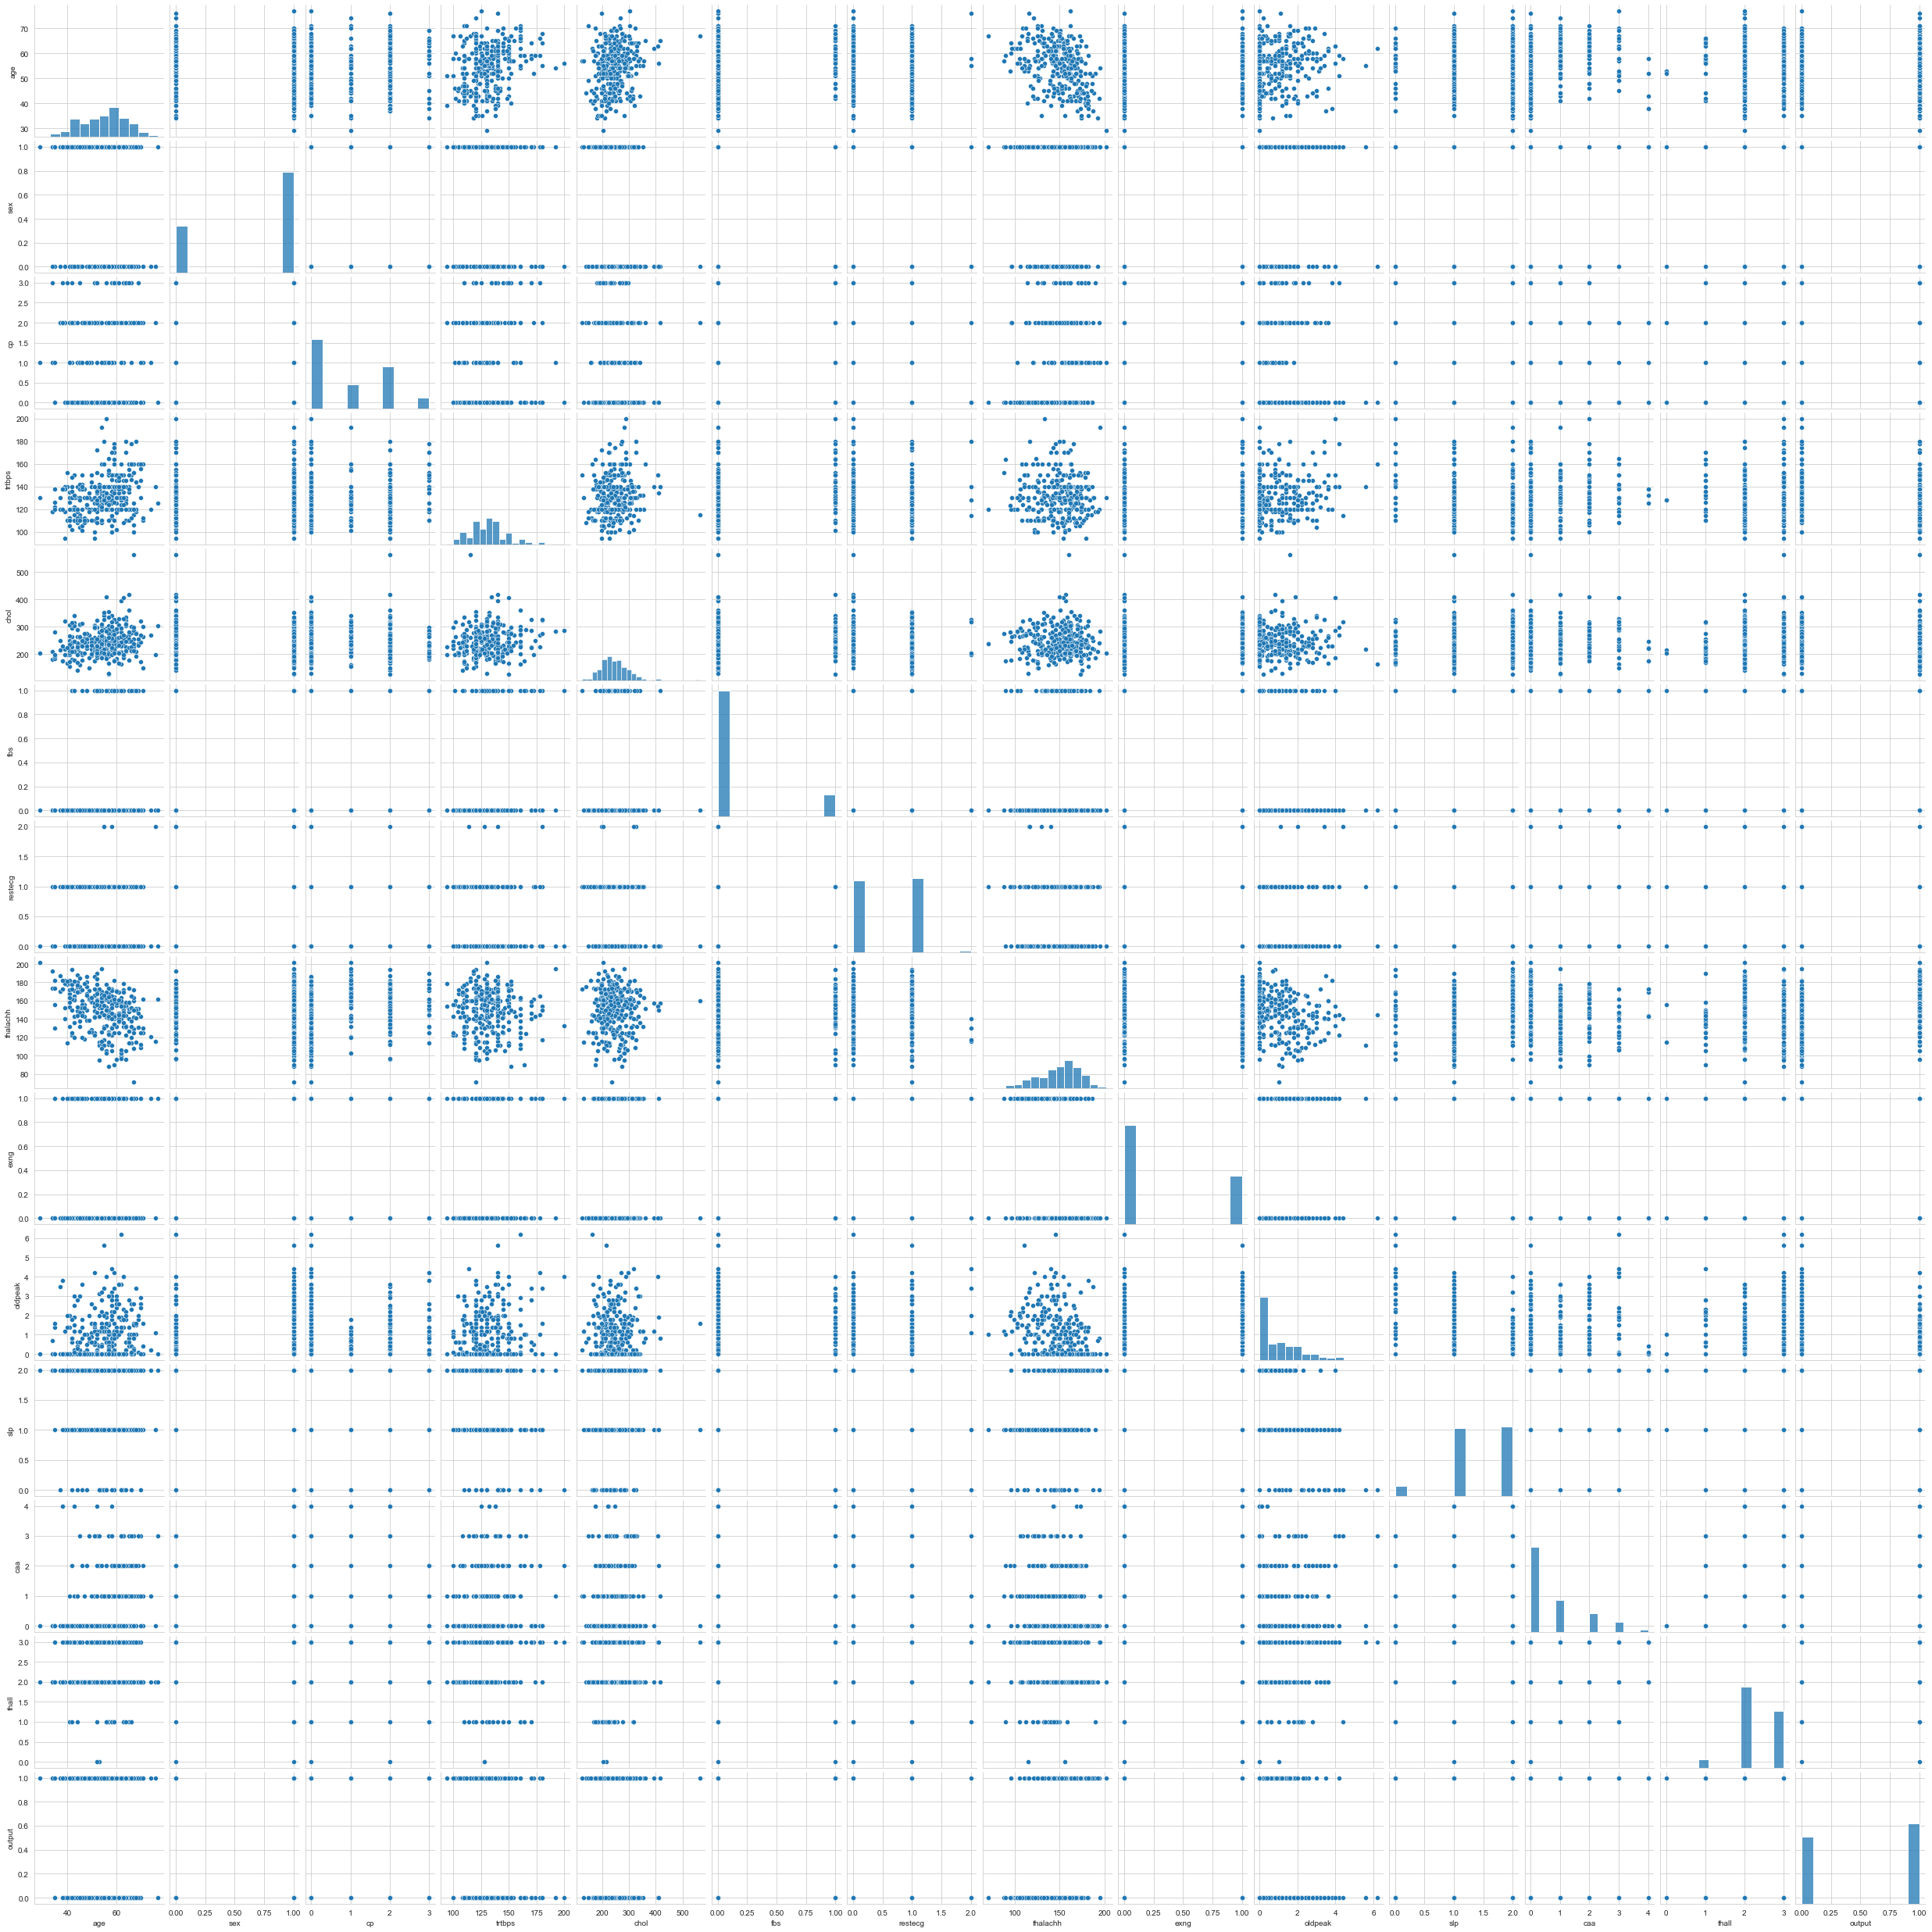

In [71]:
sb.pairplot(data)

A pairplot showing the relations between all the features

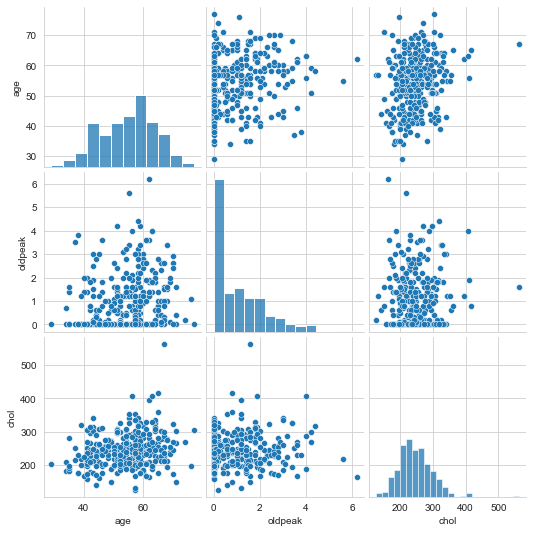

In [95]:
X = data[['age', 'oldpeak', 'chol']]
sb.pairplot(X)

# Correlation Matices

Now we will look at the correlation of all the attributes with the expected class attribute

In [78]:
# computes the standard correlation coefficient (Pearson’s r) of every feature 
corr_pearson = data.corr(method='pearson')
print('PearsonR Correlation Coefficent Matrix')
print(corr_pearson.output)

PearsonR Correlation Coefficent Matrix
age        -0.225439
sex        -0.280937
cp          0.433798
trtbps     -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalachh    0.421741
exng       -0.436757
oldpeak    -0.430696
slp         0.345877
caa        -0.391724
thall      -0.344029
output      1.000000
Name: output, dtype: float64


PearsonR Correlation Coefficent Matrix between all features and the target feature

In [85]:
corr_kendall = data.corr(method='kendall')
print(corr_kendall.output)

age        -0.197857
sex        -0.280937
cp          0.430506
trtbps     -0.102064
chol       -0.099131
fbs        -0.028046
restecg     0.147678
thalachh    0.352609
exng       -0.436757
oldpeak    -0.361731
slp         0.361406
caa        -0.430124
thall      -0.392595
output      1.000000
Name: output, dtype: float64


Kendall Correlation Coefficent Matrix between all features and the target feature

In [86]:
corr_spearman = data.corr(method='spearman')
print(corr_spearman.output)

age        -0.238400
sex        -0.280937
cp          0.460860
trtbps     -0.121593
chol       -0.120888
fbs        -0.028046
restecg     0.148612
thalachh    0.428370
exng       -0.436757
oldpeak    -0.421487
slp         0.371460
caa        -0.457607
thall      -0.403299
output      1.000000
Name: output, dtype: float64


SpearmanR Correlation Coefficent Matrix between all features and the target feature

<AxesSubplot:>

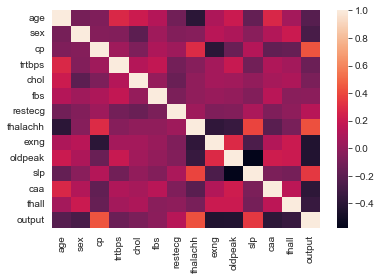

In [84]:
sb.heatmap(corr_pearson, xticklabels = corr_pearson.columns.values, yticklabels = corr_pearson.columns.values)